# Litteraturbanken Plats 
version 0.10  

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Plats.ipynb) /[nbviewer](https://nbviewer.jupyter.org/github/salgo60/open-data-examples/blob/master/Litteraturbanken%20Plats.ipynb)
  * [video](https://youtu.be/mQIFQc_jV1Y) "Wikidata Litteraturbanken platser"
* Task [T273156](https://phabricator.wikimedia.org/T273156) "Litteraturbanken karta"
* [Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank](https://www.wikidata.org/wiki/Wikidata:WikiProject_Sweden/The_Swedish_Literature_bank)

#### Other sources we sync
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-29 02:29:34.324381


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "https://litteraturbanken.se/litteraturkartan/api/Directus/items/article2?filter[status][eq]=published&limit=10000&fields=*,placeid"
r = http.request('GET', url)
data = json.loads(r.data)
df = pd.DataFrame(data["data"])

In [3]:
df.head()

,id,status,owner,created_on,sort,modified_by,modified_on,header,free_text,placeid,lb,titleurl,title,startyear,endyear,authorid,author,imgurl,category,media_file,wikidata_person_id,article_author,article_author_prefix,red_additions,prio
0,1,published,1,2020-12-10T10:40:27+00:00,None,2,2021-01-13T14:36:18+00:00,En sagans och visans man,<p>Arvid August Afzelius (1785&ndash;1871) pos...,1,True,https://litteraturbanken.se/författare/Afzeliu...,,1785,1871,AfzeliusAA,"Afzelius, Arvid August",,Person,186,None,Erik Andersson,None,"<p>Fotografiet, som är taget av Nils Edvard Fo...",NaN
1,2,published,1,2020-12-10T10:40:28+00:00,None,2,2021-01-21T10:34:50+00:00,Skandaltelegrafisten,"<p>Hilma Angered-Strandberg, som mot slutet av...",2,True,,,,,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Plats,234,None,Lotta Lotass,None,"<p>Bilden, som föreställer Falköpings station ...",NaN
2,3,published,1,2020-12-10T10:40:28+00:00,None,2,2021-01-13T07:29:27+00:00,En själs historia,"<p>""Hon f&ouml;ddes p&aring; en s&ouml;ndag, j...",3,True,https://litteraturbanken.se/författare/Angered...,Lydia Vik. En själs historia,1904,1904,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Verk,229,None,Erik Andersson,None,<p><em>Lyssna till Ingrid Elam som läser Anger...,NaN
3,4,published,1,2020-12-10T10:40:28+00:00,None,4,2021-01-26T12:40:52+00:00,Skandalernas Hilma,<p>Provinsrealismens svårigheter illustreras k...,4,True,,,1855,1927,AngeredStrandbergH,"Angered-Strandberg, Hilma",,Person,232,None,Gunnar D Hansson,None,<p><em>Läs Hilma Angered Strandbergs verk hos ...,NaN
4,5,published,1,2020-12-10T10:40:29+00:00,None,4,2021-01-27T13:52:00+00:00,Fjällbacka hos Litteraturbanken,<p>De här träffarna kommer upp när man söker p...,4,True,,,,,,,,Plats,77,None,,None,"<p><em>Bilden har vi lånat från <a href=""https...",NaN


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     511 non-null    int64  
 1   status                 511 non-null    object 
 2   owner                  511 non-null    int64  
 3   created_on             511 non-null    object 
 4   sort                   0 non-null      object 
 5   modified_by            511 non-null    int64  
 6   modified_on            511 non-null    object 
 7   header                 511 non-null    object 
 8   free_text              511 non-null    object 
 9   placeid                511 non-null    int64  
 10  lb                     511 non-null    bool   
 11  titleurl               378 non-null    object 
 12  title                  372 non-null    object 
 13  startyear              445 non-null    object 
 14  endyear                444 non-null    object 
 15  author

In [5]:
df.describe() 

,id,owner,modified_by,placeid,media_file,prio
count,511.000000,511.000000,511.000000,511.000000,511.000000,21.000000
mean,277.268102,1.577299,2.185910,231.964775,214.332681,6.619048
std,158.989211,0.950435,0.596293,139.019884,92.711882,3.216772
min,1.000000,1.000000,1.000000,1.000000,17.000000,0.000000
25%,136.500000,1.000000,2.000000,107.500000,135.000000,5.000000
50%,282.000000,1.000000,2.000000,243.000000,206.000000,8.000000
75%,418.500000,2.000000,2.000000,353.000000,301.000000,9.000000
max,547.000000,4.000000,4.000000,475.000000,367.000000,10.000000


In [6]:
df.category.value_counts()

Person         172
Plats          101
Linnés resa     96
Verk            87
Resa            51
Name: category, dtype: int64

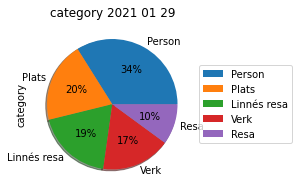

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt   
plotCategory = df.category.value_counts()  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "category " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [8]:
df.authorid.value_counts()[:30]

LinnéCvon             104
                       39
TörnqvistP             21
TaubeE                 16
HanssonGD              14
AlmqvistCJL            11
WollstonecraftM        11
LagerlöfS               9
WideAG                  9
WedelK                  8
NordströmL              7
AnderssonD              7
EdfeltJ                 6
WennerbergG             4
AngeredStrandbergH      4
BoyeK                   4
Anonym                  4
RydbergV                4
HasselskogN             4
SpolénE                 3
ThorildT                3
LindqvistE              3
KnorringS               3
ElkanS                  3
AroseniusI              3
LinnerhielmJC           3
ErfurthS                3
FlygareCarlénE          3
KellgrenJH              2
CarlénJG                2
Name: authorid, dtype: int64

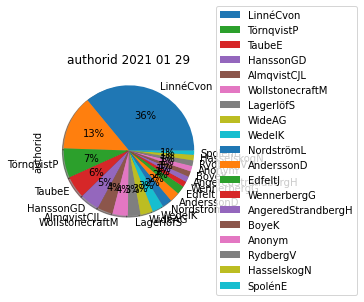

In [9]:
plotCategory = df.authorid.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "authorid " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [10]:
df.article_author.value_counts()

Erik Andersson      241
Lilian Perme         50
Dick Claésson        46
Gunnar D Hansson     33
Peter Törnqvist      21
Paulina Helgeson      9
Kristian Wedel        8
                      8
Lotta Lotass          3
Jonas Ellerström      2
Cai Alfredson         2
Name: article_author, dtype: int64

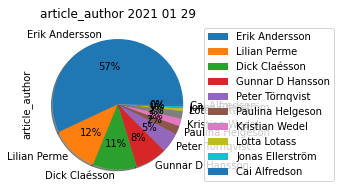

In [11]:
plotCategory = df.article_author.value_counts()[:20]  
fig, ax = plt.subplots(figsize=(6, 3))
plotCategory.plot.pie( \
                   autopct='%1.0f%%', \
                   shadow=True, startangle=0, \
                   title = "article_author " + start_time.strftime('%Y %m %d'))
ax.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [14]:
df.wikidata_person_id.value_counts() 

Q4952353    2
Q5615947    1
Q4941859    1
Q4990447    1
Q5808708    1
Name: wikidata_person_id, dtype: int64

In [12]:
import pandas_profiling as pp
eda = pp.ProfileReport(df)
display(eda)

In [13]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ass.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-29 02:29:58.225601
Time elapsed (hh:mm:ass.ms) 0:00:23.901404
